In [1]:
import pandas as pd

In [53]:
data=pd.read_csv('Hotel_Reviews.csv')
data.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [46]:
data.shape

(515738, 17)

In [47]:
data.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

In [54]:
# we are dropping the columns because it is not usefull for  our model

data.drop(['lat','lng'],axis=1,inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [55]:
#code for splitting the 'days_since_review' into two

data["days_since_review"]= data["days_since_review"].str.split(" ", n = 1, expand = True) 

# df display 
data.head(2) 

#changing the dtype of "days_since_review" column
data['days_since_review']=data['days_since_review'].astype('int')


In [57]:
# code for creating the Depedent variable label

# append the positive and negative text reviews
data["review"] = data["Negative_Review"] + data["Positive_Review"]
# create the label
data["Positive_Negative review"] =data["Reviewer_Score"].apply(lambda x: 0 if x < 5 else 1)
# select only relevant columns
data1 = data[["review", "Positive_Negative review"]]
data1.head(2)

,review,Positive_Negative review
0,I am so angry that i made this post available...,0
1,No Negative No real complaints the hotel was g...,1


In [59]:
data.head(2)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,review,Positive_Negative review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,I am so angry that i made this post available...,0
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0,No Negative No real complaints the hotel was g...,1


In [35]:
cat=[]
num=[]
for i in data.columns:
    if data[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)


['Hotel_Address', 'Review_Date', 'Hotel_Name', 'Reviewer_Nationality', 'Negative_Review', 'Positive_Review', 'Tags']
['Additional_Number_of_Scoring', 'Average_Score', 'Review_Total_Negative_Word_Counts', 'Total_Number_of_Reviews', 'Review_Total_Positive_Word_Counts', 'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'days_since_review']


In [60]:
data1.head(2)

,review,Positive_Negative review
0,I am so angry that i made this post available...,0
1,No Negative No real complaints the hotel was g...,1


In [61]:
#taking only 1% of the data  from 515738 rows for computational ease

data1 = data1.sample(frac = 0.1, replace = False, random_state=42)

In [62]:
data1.shape

(51574, 2)

In [64]:
# these comments are removed from review column , because it is shown in the column when there is no review given by the customer

# remove 'No Negative' or 'No Positive' from text
data1["review"] = data1["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [68]:
# return the wordnet object value corresponding to the POS tag
import nltk
from nltk.corpus import wordnet

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
data1["review_clean"] =data1["review"].apply(lambda x: clean_text(x))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sony\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sony\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [69]:
data1.head(2)

,review,Positive_Negative review,review_clean
488440,Would have appreciated a shop in the hotel th...,1,would appreciate shop hotel sell drinking wate...
274649,No tissue paper box was present at the room,1,tissue paper box present room


To clean textual data, we call our custom 'clean_text' function that performs several transformations:

lower the text
tokenize the text (split the text into words) and remove the punctuation
remove useless words that contain numbers
remove useless stop words like 'the', 'a' ,'this' etc.
Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)
Now that we have cleaned our data, we can do some feature engineering for our modelization part.

In [72]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
data1["sentiments"] = data1["review"].apply(lambda x: sid.polarity_scores(x))
data1 = pd.concat([data1.drop(['sentiments'], axis=1), data1['sentiments'].apply(pd.Series)], axis=1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sony\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


We first start by adding sentiment analysis features because we can guess that customers reviews are highly linked to how they felt about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into accout the context of the sentences to determine the sentiment scores. For each text, Vader retuns 4 values:

1. neutrality score
2. positivity score
3. negativity score
4. compound Score(overall score that summarizes the previous scores)

We will integrate those 4 values as features in our dataset.

In [73]:
data1.head(2)

,review,Positive_Negative review,review_clean,neg,neu,pos,compound
488440,Would have appreciated a shop in the hotel th...,1,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924
274649,No tissue paper box was present at the room,1,tissue paper box present room,0.216,0.784,0.000,-0.2960


In [75]:
# add number of characters column
data1["nb_chars"] =data1["review"].apply(lambda x: len(x))

# add number of words column
data1["nb_words"] = data1["review"].apply(lambda x: len(x.split(" ")))

Next, we add some simple metrics for every text:

number of characters in the text
number of words in the text

In [78]:
!pip install gensim


  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.23
    Uninstalling Cython-0.29.23:
      Successfully uninstalled Cython-0.29.23


In [80]:
# create doc2vec vector columns
import gensim
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(data1["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = data1["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
data1 = pd.concat([data1, doc2vec_df], axis=1)

The next step consist in extracting vector representations for every review. The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [81]:
data1.head(2)

,review,Positive_Negative review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
488440,Would have appreciated a shop in the hotel th...,1,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,-0.137356,0.322255,0.009187,0.091387,-0.572614
274649,No tissue paper box was present at the room,1,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,0.131561,0.137362,0.046007,-0.016853,-0.126259


In [84]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=7f4305fc68b58f66a83bbc6b627601832ad8a1223308dadd729b1a922901e29c
  Stored in directory: c:\users\sony\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [86]:
# add tf-idfs columns
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(data1["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = data1.index
data1 = pd.concat([data1, tfidf_df], axis=1)

Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.

But why not simply counting how many times ea1ach word appears in every document? The problem with this method is that it doesn't take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:

TF computes the classic number of times the word appears in the text
IDF computes the relative importance of this word which depends on how many texts the word can be found
We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

In [87]:
data1.head(2)

,review,Positive_Negative review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_yet,word_yoghurt,word_yogurt,word_young,word_yr,word_yummy,word_zero,word_ziggo,word_zone,word_zuid
488440,Would have appreciated a shop in the hotel th...,1,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,-0.137356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,No tissue paper box was present at the room,1,tissue paper box present room,0.216,0.784,0.000,-0.2960,44,10,0.131561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# show is_bad_review distribution
data1["Positive_Negative review"].value_counts(normalize = True)

1    0.956761
0    0.043239
Name: Positive_Negative review, dtype: float64

Our dataset is highly imbalanced because less than 5% of our reviews are considered as negative ones. This information will be very useful for the modelling part.

In [91]:
!pip install wordcloud

Matplotlib is building the font cache; this may take a moment.


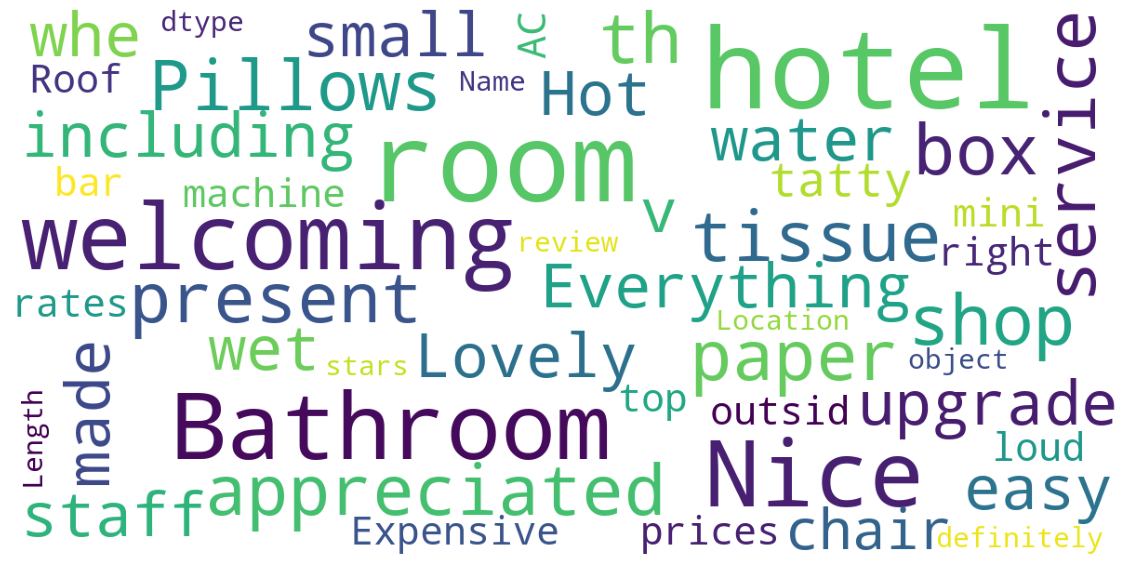

In [92]:
# wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud

show_wordcloud(data1["review"])


In [94]:
!pip install seaborn

C:\Users\Sony\Anaconda3\envs\tensorflow sessions\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Sony\Anaconda3\envs\tensorflow sessions\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


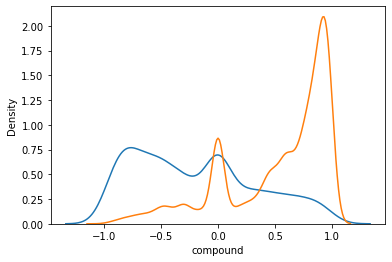

In [97]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = data1[data1['Positive_Negative review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Bad reviews"
    else:
        label = "Good reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [99]:
# feature selection
label = "Positive_Negative review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in data1.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1[features], data1[label], test_size = 0.20, random_state = 42)

We first choose which features we want to use to train our model. Then we split our data into two parts:

one to train our model
one to assess its performances
We will next use a Random Forest (RF) classifier for our predictions.

In [100]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.037057
2,pos,0.025812
6,doc2vec_vector_0,0.022839
0,neg,0.021342
10,doc2vec_vector_4,0.017700
8,doc2vec_vector_2,0.017580
4,nb_chars,0.017141
9,doc2vec_vector_3,0.016857
7,doc2vec_vector_1,0.016146
1,neu,0.014990


The most important features are indeed the ones that come from the previous sentiment analysis. The vector representations of the texts also have a lot of importance in our training. Some words appear to have a fairly good importance as well.

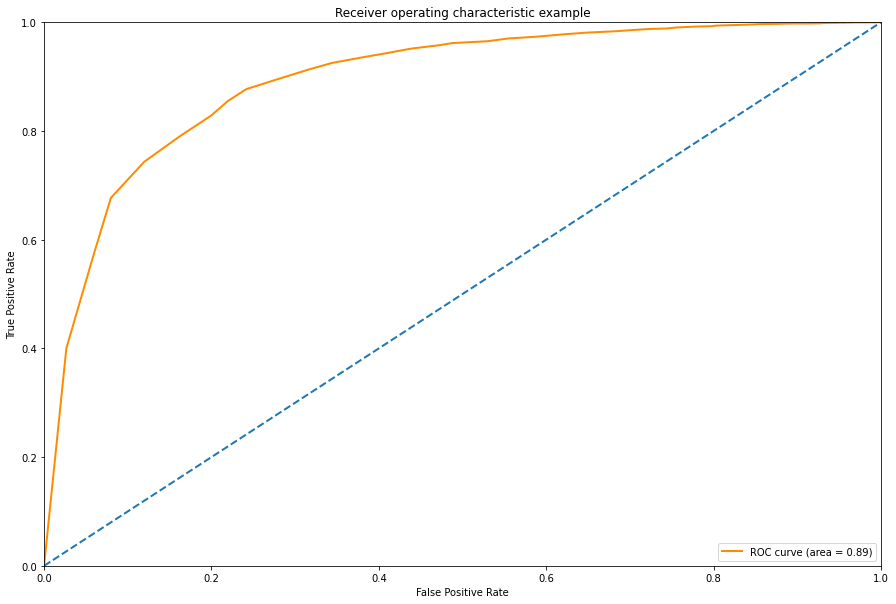

In [102]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example'),plt.legend(loc="lower right")
plt.show()

The ROC (Receiver Operating Characteristic) curve is usually a good graph to summarize the quality of our classifier. The higher the curve is above the diagonal baseline, the better the predictions. Although the AUC ROC (Area Under the Curve ROC) is very good, we should not use here the ROC curve to assess the quality of our model.

Why? First let us remind the False Positive Rate formula, which corresponds to the x axis of the ROC curve: FPR (False Positive Rate) = # False Positives / # Negatives.

Here the # Negatives corresponds to our number of good reviews which is very high because our dataset is imbalanced. This means that even with some False Positives, our FPR will tend to stay very low. Our model will be able to make a lot of false positives predictions and still have a low false positive rate, while increasing the true positive rate and therefore artificially increasing the AUC ROC metric.

# Conclusion

It is completely possible to use only raw text as input for making predictions. The most important thing is to be able to extract the relevant features from this raw source of data. This kind of data can often come as a good complementary source in data science projects in order to extract more learning features and increase the predictive power of the models.